AI-Generated Notebook for DANDI:001363

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Please be cautious when interpreting the code or results.

This notebook explores the data in DANDI Archive Dandiset 001363, "Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound".

This dataset contains neural spiking data in the rat somatosensory cortex using a flexible electrode responding to transcranial focused ultrasound.

The notebook will guide you through the following steps:

1.  Loading the Dandiset metadata
2.  Exploring the dataset structure
3.  Accessing and visualizing sample data from NWB files
4.  Example analyses that might be relevant to the dataset's content

Before running this notebook, make sure you have the following packages installed:

```bash
pip install dandi pynwb lindi matplotlib seaborn
```

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())
print(f"Number of assets: {len(assets)}")
assets

Number of assets: 1


[RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x7f648534d8d0>, identifier='b8de194c-d6ad-42e4-9e8f-bddffd2dc86b', path='sub-BH643/sub-BH643_ecephys.nwb', size=3186023744, created=datetime.datetime(2025, 3, 26, 2, 4, 32, 241018, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 3, 26, 2, 4, 32, 241046, tzinfo=TzInfo(UTC)), blob='6b6228d2-6785-4806-8c32-fb2c9103f622', dandiset_id='001363', version_id='draft')]

We can inspect the Dandiset metadata to learn more about the dataset.

In [2]:
dandiset.get_metadata()

Dandiset(id='DANDI:001363/draft', schemaKey='Dandiset', schemaVersion='0.6.9', name='Neural Spiking Data in the Rat Somatosensory Cortex Using a Flexible Electrode Responding to Transcranial Focused Ultrasound', description='In this study, we investigate the neuronal response to transcranial focused ultrasound stimulation (tFUS) on the somatosensory cortex using a 128-element array transducer and a chronically implanted flexible electrode. This flexible electrode allows us to  study higher intensities of tFUS which are impossible with a rigid electrode due to the vibration artifacts that are created. Here we test 5 different levels of intensity including 100, 400, 700, 1000, and 1300 kPa. We then tested the effect of varying duty cycle while keeping the pulse repetition frequency (PRF) constant while using the highest intensity (1300 kPa), testing duty cycles of 0.6%, 6%, 30%, 60%, and 90% while holding PRF at 1500 Hz. Finally we tested the effect of varying PRF while holding duty cycl

We can see the description of the dataset:

> In this study, we investigate the neuronal response to transcranial focused ultrasound stimulation (tFUS) on the somatosensory cortex using a 128-element array transducer and a chronically implanted flexible electrode. This flexible electrode allows us to study higher intensities of tFUS which are impossible with a rigid electrode due to the vibration artifacts that are created. Here we test 5 different levels of intensity including 100, 400, 700, 1000, and 1300 kPa. We then tested the effect of varying duty cycle while keeping the pulse repetition frequency (PRF) constant while using the highest intensity (1300 kPa), testing duty cycles of 0.6%, 6%, 30%, 60%, and 90% while holding PRF at 1500 Hz. Finally we tested the effect of varying PRF while holding duty cycle constant, testing PRFs of 30, 300, 1500, 3000, and 4500 Hz with a duty cycle of 30%. In each of these, the fundamental frequency of ultrasound was 1500 kHz, and the ultrasound duration was 67 ms, with trials performed every 2 seconds, with a jitter of 10%. Each recording has 505 trials.

Now let's explore the contents of the NWB file.

This is how you would access data in this particular NWB file using lindi and pynwb.

In [3]:
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

Load the NWB file

In [4]:
lindi_url = "https://lindi.neurosift.org/dandi/dandisets/001363/assets/b8de194c-d6ad-42e4-9e8f-bddffd2dc86b/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Information about the NWB file

In [5]:
nwb.session_description # (str) Rat Ultrasound Array Stimulation

np.str_('Rat Ultrasound Array Stimulation')

In [6]:
nwb.identifier # (str) BH643_4500_67_50V

np.str_('BH643_4500_67_50V')

In [7]:
nwb.session_start_time # (datetime) 2024-12-20T19:53:03.000000-05:00

datetime.datetime(2024, 12, 20, 19, 53, 3, tzinfo=tzoffset(None, -18000))

Access the ElectricalSeries data

In [8]:
electrical_series = nwb.acquisition["ElectricalSeries"]
data = electrical_series.data
rate = electrical_series.rate
electrodes = nwb.electrodes

Plot the first few seconds of data from a few channels

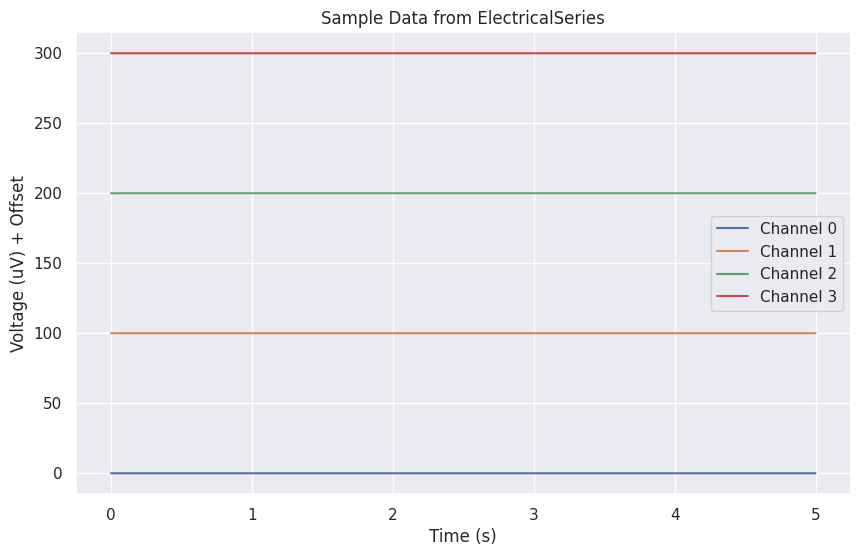

In [9]:
num_channels = 4
duration = 5  # seconds
num_samples = int(duration * rate)
channels = range(num_channels)

plt.figure(figsize=(10, 6))
for i, channel in enumerate(channels):
    plt.plot(np.linspace(0, duration, num_samples), data[:num_samples, channel] + i * 100, label=f"Channel {channel}")  # Add offset for clarity
plt.xlabel("Time (s)")
plt.ylabel("Voltage (uV) + Offset")
plt.title("Sample Data from ElectricalSeries")
plt.legend()
plt.savefig("tmp_scripts/electrical_series.png")
plt.show()

The plot shows constant voltage levels across multiple channels over time. This could indicate baseline data or a test signal. The plot is informative in that it shows the channel separation.

Plot electrode locations

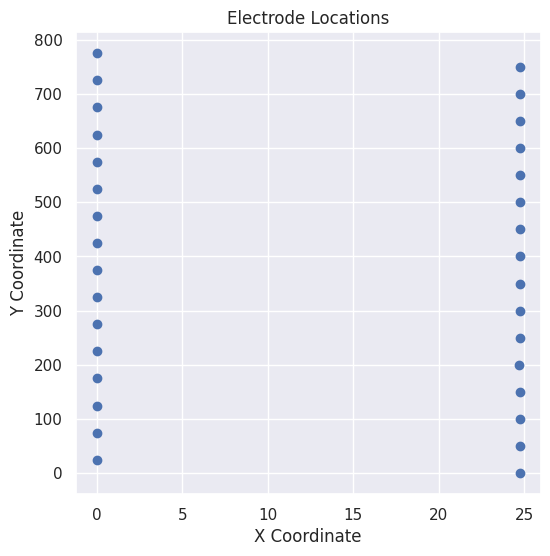

In [10]:
electrode_x = electrodes["x"].data[:]
electrode_y = electrodes["y"].data[:]

plt.figure(figsize=(6, 6))
plt.scatter(electrode_x, electrode_y)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Electrode Locations")
plt.savefig("tmp_scripts/electrode_locations.png")
plt.show()

The electrode locations plot shows two vertical columns of data points, representing the spatial configuration of electrodes. The electrodes are placed on two vertical lines, evenly spaced.

Access trials data

In [11]:
trials = nwb.intervals["trials"]
start_time = trials["start_time"].data[:]
stop_time = trials["stop_time"].data[:]

Plot trials start and stop times

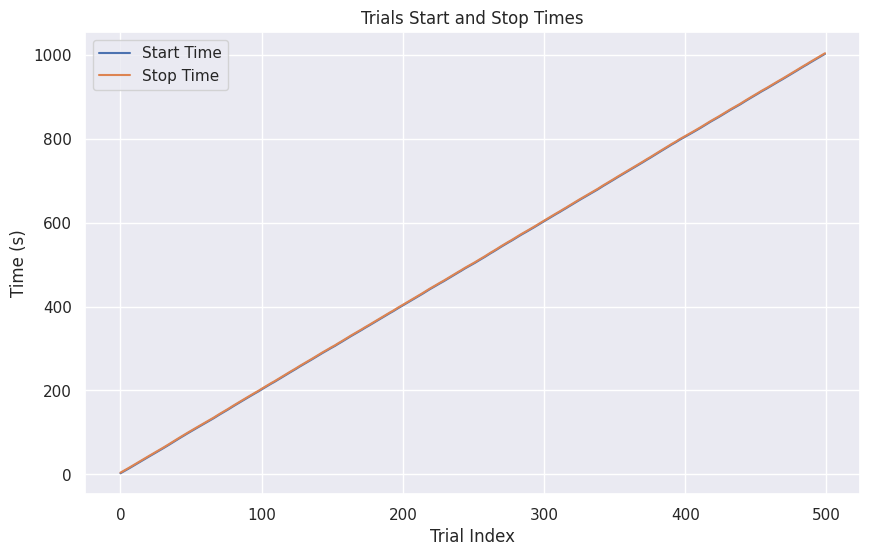

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(start_time, label="Start Time")
plt.plot(stop_time, label="Stop Time")
plt.xlabel("Trial Index")
plt.ylabel("Time (s)")
plt.title("Trials Start and Stop Times")
plt.legend()
plt.savefig("tmp_scripts/trials_start_stop.png")
plt.show()

The trials start and stop times plot shows the start and stop times of trials, with overlapping lines indicating that the start and stop times are almost identical for each trial. The lines exhibit a linear trend, suggesting that both start and stop times increase uniformly with each trial.